In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema #1:


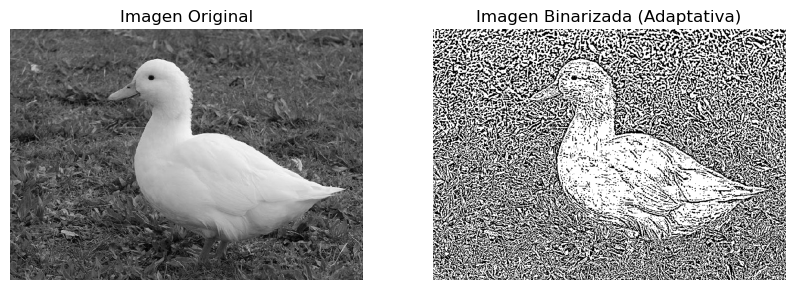

In [7]:
def adaptive_binarize_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    binary_image = cv2.adaptiveThreshold(
        image, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        11,  
        2    
    )
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Imagen Binarizada (Adaptativa)')
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')

    plt.show()

    return binary_image

image_path = 'pato.jpg'
binarized_image = adaptive_binarize_image(image_path)

## Problema #2

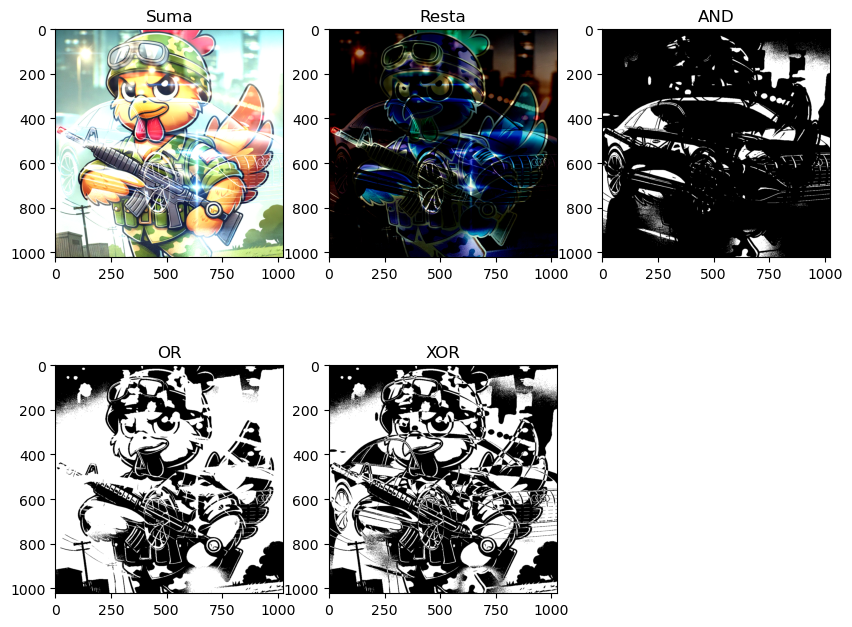

In [3]:
def binarizar_imagen(imagen):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    _, imagen_binaria = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY)
    return imagen_binaria

def operar_imagenes(img1, img2):
    
    # Suma
    suma = cv2.add(img1, img2)
    
    # Resta
    resta = cv2.subtract(img1, img2)
    
    # Binarizar ambas imágenes
    img1_binaria = binarizar_imagen(img1)
    img2_binaria = binarizar_imagen(img2)
    
    # Operaciones AND, OR, XOR
    and_img = cv2.bitwise_and(img1_binaria, img2_binaria)
    or_img = cv2.bitwise_or(img1_binaria, img2_binaria)
    xor_img = cv2.bitwise_xor(img1_binaria, img2_binaria)
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(suma, cv2.COLOR_BGR2RGB))
    plt.title("Suma")
    
    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(resta, cv2.COLOR_BGR2RGB))
    plt.title("Resta")
    
    plt.subplot(2, 3, 3)
    plt.imshow(and_img, cmap='gray')
    plt.title("AND")
    
    plt.subplot(2, 3, 4)
    plt.imshow(or_img, cmap='gray')
    plt.title("OR")
    
    plt.subplot(2, 3, 5)
    plt.imshow(xor_img, cmap='gray')
    plt.title("XOR")
    
    plt.show()

img1 = cv2.imread('auto.webp')
img2 = cv2.imread('pollo.webp')

operar_imagenes(img1, img2)


## Problema #3

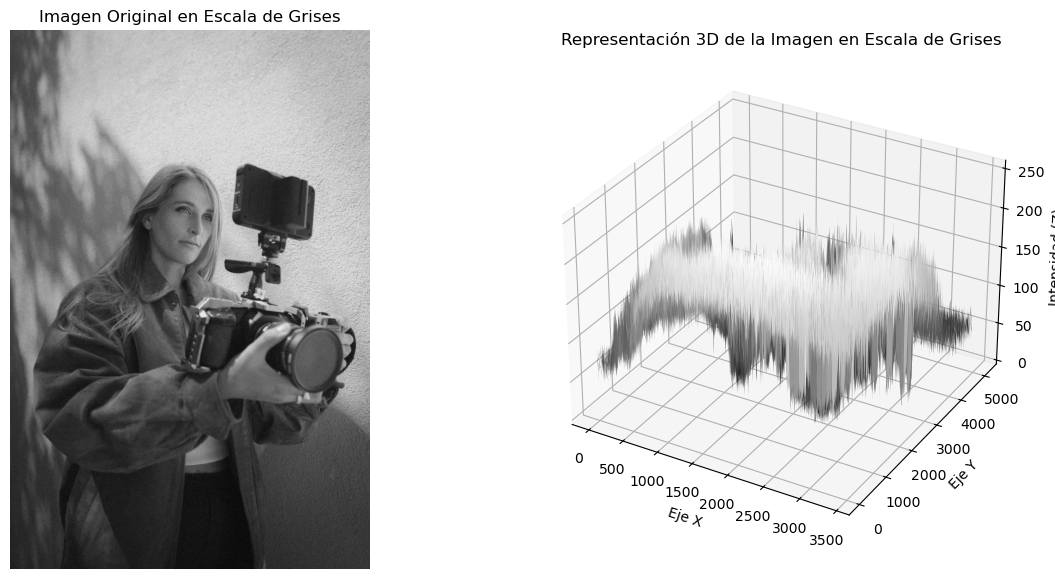

In [10]:
def mostrar_imagen_y_3d(imagen):
    filas, columnas = imagen.shape
    
    X, Y = np.meshgrid(np.arange(columnas), np.arange(filas))
    fig = plt.figure(figsize=(14, 7))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(imagen, cmap='gray')
    ax1.set_title("Imagen Original en Escala de Grises")
    ax1.axis('off')  
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X, Y, imagen, cmap='gray', edgecolor='none')
    
    ax2.set_xlabel('Eje X')
    ax2.set_ylabel('Eje Y')
    ax2.set_zlabel('Intensidad (Z)')
    
    plt.title("Representación 3D de la Imagen en Escala de Grises")
    plt.show()
imagen_gris = cv2.imread('fotografa.jpg', cv2.IMREAD_GRAYSCALE)
mostrar_imagen_y_3d(imagen_gris)


## Problema #4

In [12]:
# Transformación Negativa
def transformacion_negativa(imagen):
    return 255 - imagen


In [13]:
# Transformación Lineal
def transformacion_lineal(imagen, a=1, b=0):
    imagen_lineal = a * imagen + b
    return np.clip(imagen_lineal, 0, 255).astype(np.uint8)


In [14]:
# Transformación Logarítmica
def transformacion_logaritmica(imagen, c=1):
    imagen_float = imagen.astype(float)
    return c * np.log1p(imagen_float).astype(np.uint8)


In [15]:
# Transformación Exponencial
def transformacion_exponencial(imagen, c=1, gamma=1):
    imagen_normalizada = imagen / 255.0
    imagen_exp = c * np.power(imagen_normalizada, gamma)
    return np.clip(imagen_exp * 255, 0, 255).astype(np.uint8)

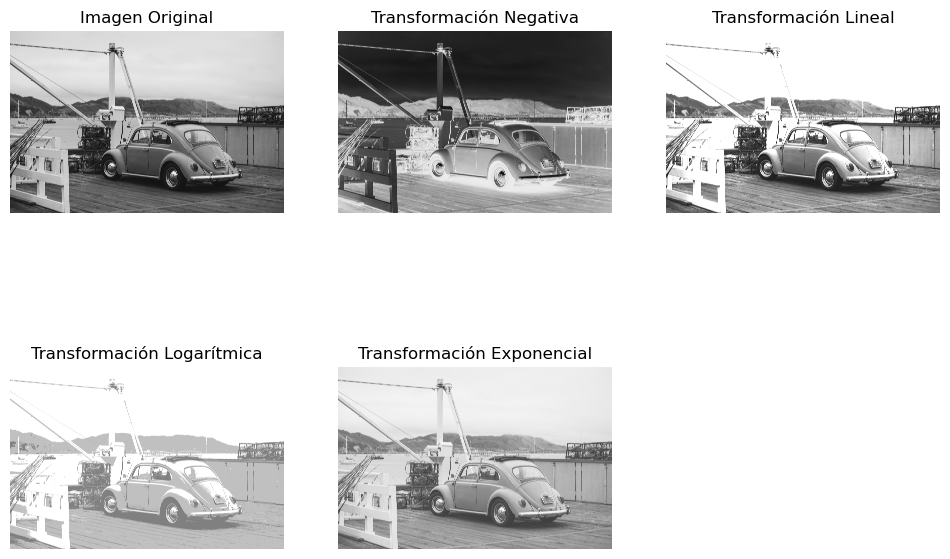

In [16]:
def mostrar_transformaciones(imagen):
    negativa = transformacion_negativa(imagen)
    lineal = transformacion_lineal(imagen, a=1.5, b=10)
    logaritmica = transformacion_logaritmica(imagen, c=30)
    exponencial = transformacion_exponencial(imagen, c=1, gamma=0.4)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title("Imagen Original")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(negativa, cmap='gray')
    plt.title("Transformación Negativa")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(lineal, cmap='gray')
    plt.title("Transformación Lineal")
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(logaritmica, cmap='gray')
    plt.title("Transformación Logarítmica")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(exponencial, cmap='gray')
    plt.title("Transformación Exponencial")
    plt.axis('off')

    plt.show()

imagen_gris = cv2.imread('carrito.jpg', cv2.IMREAD_GRAYSCALE)
mostrar_transformaciones(imagen_gris)


## Problema #5:

Kernel Laplaciano
El kernel Laplaciano es un filtro de detección de bordes basado en la segunda derivada de la imagen. Este enfoque realza las áreas donde hay cambios rápidos en la intensidad de los píxeles, lo que corresponde a los bordes de los objetos. Al ser un operador de segunda derivada, es muy sensible al ruido, pero puede detectar bordes en todas las direcciones sin necesidad de diferenciar entre direcciones como lo hacen otros operadores, como Sobel.

Diferencias con el Algoritmo de Canny
El algoritmo de Canny es un método de detección de bordes más avanzado y robusto que incluye varios pasos: suavizado de la imagen para reducir el ruido, cálculo de la intensidad del gradiente (primera derivada), no máximo supresión (para afinar los bordes) y la aplicación de umbrales con histéresis para conectar bordes débiles.

Diferencias clave:

Ruido: El Laplaciano es más sensible al ruido debido a su dependencia de la segunda derivada, mientras que Canny incluye un paso de suavizado para mitigar este problema.
Dirección de bordes: El Laplaciano no considera la dirección del borde, detectando bordes en todas las direcciones, mientras que Canny lo hace utilizando gradientes direccionales.
Umbralización: Canny utiliza umbrales con histéresis para una detección de bordes más precisa, reduciendo la probabilidad de falsos bordes, cosa que el filtro Laplaciano no hace.